## JWST F770W NGC3132 ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 18 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
basename = "jw0273300200"

crval = [151.75705520150103, -40.436433360520084]
# rotation = 112.
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
tile1_shifts = [0.17320409635878223, -0.06012765659475183]
tile2_shifts = [0.17320409635878223, -0.06012765659475183]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [15., 350.]
# display range for calibrated images
drange_cal = [4., 200.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F770W/stage0/jw02733002001_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00005_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00005_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00001_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00003_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00006_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00006_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00008_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00003_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00008_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02733002002_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02733002001_02101_000

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-18 14:08:56,090 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:08:56,091 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:08:56,092 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:08:56,093 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:08:56,093 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:08:56,094 - stpipe 

./F770W/stage0/jw02733002001_02101_00002_mirimage_uncal.fits


2022-07-18 14:08:56,203 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-18 14:09:03,221 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_wfssbkg_0007.rmap    3.1 K bytes  (16 / 59 files) (75.1 K / 279.1 K bytes)
2022-07-18 14:09:03,244 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_wavemap_0008.rmap    2.2 K bytes  (17 / 59 files) (78.2 K / 279.1 K bytes)
2022-07-18 14:09:03,271 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_spectrace_0008.rmap    2.3 K bytes  (18 / 59 files) (80.4 K / 279.1 K bytes)
2022-07-18 14:09:03,294 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_specprofile_0008.rmap    2.4 K bytes  (19 / 59 files) (82.7 K / 279.1 K bytes)
2022-07-18 14:09:03,322 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_saturation_0014.rmap      761 bytes  (20 / 59 files) (85.1 K / 279.1 K bytes)
2022-07-18 14:09:03,352 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/mappings/jwst/jwst_niriss_phot

2022-07-18 14:10:51,897 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_reset_0070.fits  207.1 M bytes  (4 / 5 files) (6.1 G / 6.3 G bytes)
2022-07-18 14:10:57,666 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_saturation_0027.fits    8.5 M bytes  (5 / 5 files) (6.3 G / 6.3 G bytes)
2022-07-18 14:10:57,899 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:10:57,900 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:10:57,902 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:10:57,904 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references

2022-07-18 14:11:03,870 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:11:03,888 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:11:04,754 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:11:04,855 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00002_mirimage_uncal.fits>,).
2022-07-18 14:11:04,857 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:11:11,423 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:11:11,439 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:11:11,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2693 pixels with at least one CR from five groups.
2022-07-18 14:11:11,445 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:11:11,445 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-18 14:11:11,520 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:11:11,557 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from thr

2022-07-18 14:11:12,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:11:12,995 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:11:13,056 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2416 pixels with at least one CR from five groups.
2022-07-18 14:11:13,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:11:13,057 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:11:13,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:11:13,192 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2706 pixels with at least one CR from five groups.
2022-07-18 14:11:13,193 - stpipe.Detector1Pipeline.jump

2022-07-18 14:11:28,192 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002001_02101_00002_mirimage_rate.fits
2022-07-18 14:11:28,192 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:11:28,200 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:11:28,201 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:11:28,201 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:11:28,202 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix'

2022-07-18 14:11:28,331 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

./F770W/stage0/jw02733002002_02101_00005_mirimage_uncal.fits


2022-07-18 14:11:30,529 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:11:30,539 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:11:30,540 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:11:30,541 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:11:30,542 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:11:36,098 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:11:36,118 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:11:36,867 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:11:36,971 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00005_mirimage_uncal.fits>,).
2022-07-18 14:11:36,972 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:11:43,025 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:11:43,026 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-18 14:11:43,038 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:11:43,096 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:11:43,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2514 pixels with at least one CR from five groups.
2022-07-18 14:11:43,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-18 14:11:43,103 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-18 14:11:44,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:11:44,459 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:11:44,657 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2766 pixels with at least one CR from five groups.
2022-07-18 14:11:44,658 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:11:44,659 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:11:44,754 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:11:44,941 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3947 pixels with at least one CR from five groups.
2022-07-18 14:11:44,942 - stpipe.Detector1Pipeline.jump

2022-07-18 14:11:59,788 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:11:59,788 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:11:59,789 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:11:59,789 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-18 14:11:59,790 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F770W/stage0/jw02733002001_02101_00007_mirimage_uncal.fits


2022-07-18 14:12:02,296 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:12:02,302 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:12:02,304 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:12:02,305 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:12:02,306 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:12:07,885 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:12:07,904 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:12:08,632 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:12:08,739 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00007_mirimage_uncal.fits>,).
2022-07-18 14:12:08,740 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:12:14,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2706 pixels with at least one CR from five groups.
2022-07-18 14:12:14,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:12:14,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-18 14:12:14,921 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:12:14,943 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:12:14,948 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2253 pixels with at least one CR from five groups.
2022-07-18 14:12:14,949 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:12:16,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:12:16,233 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:12:16,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3078 pixels with at least one CR from five groups.
2022-07-18 14:12:16,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:12:16,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:12:16,444 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:12:16,625 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4337 pixels with at least one CR from five gro

2022-07-18 14:12:31,080 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:12:31,081 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:12:31,081 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:12:31,082 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-18 14:12:31,083 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F770W/stage0/jw02733002001_02101_00005_mirimage_uncal.fits


2022-07-18 14:12:33,718 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:12:33,724 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:12:33,726 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:12:33,727 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:12:33,728 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:12:39,275 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:12:39,294 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:12:40,020 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:12:40,132 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00005_mirimage_uncal.fits>,).
2022-07-18 14:12:40,133 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:12:46,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2633 pixels with at least one CR from five groups.
2022-07-18 14:12:46,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-18 14:12:46,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-18 14:12:46,182 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:12:46,210 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:12:46,216 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3185 pixels with at least one CR from five groups.
2022-07-18 14:12:46,219 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:12:47,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:12:47,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:12:47,605 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2445 pixels with at least one CR from five groups.
2022-07-18 14:12:47,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:12:47,607 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:12:47,874 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:12:48,085 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4388 pixels with at least one CR from five gro

2022-07-18 14:13:02,900 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:13:02,900 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:13:02,901 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:13:02,901 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:13:02,902 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F770W/stage0/jw02733002002_02101_00001_mirimage_uncal.fits


2022-07-18 14:13:05,213 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:13:05,217 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:13:05,218 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:13:05,219 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:13:05,221 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:13:10,563 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:13:10,582 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:13:11,282 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:13:11,395 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00001_mirimage_uncal.fits>,).
2022-07-18 14:13:11,396 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:13:17,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2556 pixels with at least one CR from five groups.
2022-07-18 14:13:17,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:13:17,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:17,481 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:13:17,497 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-18 14:13:17,490 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:13:17,495 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-18 14:13:18,957 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:13:18,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:19,041 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2949 pixels with at least one CR from five groups.
2022-07-18 14:13:19,042 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:13:19,043 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:19,214 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:13:19,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4606 pixels with at least one CR from five gro

2022-07-18 14:13:33,181 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:13:33,181 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:13:33,182 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:13:33,183 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:13:33,183 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F770W/stage0/jw02733002002_02101_00003_mirimage_uncal.fits


2022-07-18 14:13:35,538 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:13:35,541 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:13:35,543 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:13:35,544 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:13:35,545 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:13:41,137 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:13:41,160 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:13:41,890 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:13:42,007 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00003_mirimage_uncal.fits>,).
2022-07-18 14:13:42,008 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:13:48,163 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2687 pixels with at least one CR from five groups.
2022-07-18 14:13:48,165 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:13:48,215 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:13:48,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2674 pixels with at least one CR from five groups.
2022-07-18 14:13:48,221 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-18 14:13:48,221 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:4

2022-07-18 14:13:49,778 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:13:49,779 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:49,850 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:13:49,895 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:13:50,039 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2911 pixels with at least one CR from five groups.
2022-07-18 14:13:50,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-18 14:13:50,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:13:50,101 - stpipe.Detector1Pipeline.jump - 

2022-07-18 14:14:04,845 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:14:04,845 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:14:04,846 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:14:04,846 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:14:04,847 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F770W/stage0/jw02733002002_02101_00004_mirimage_uncal.fits


2022-07-18 14:14:07,427 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:14:07,431 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:14:07,432 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:14:07,433 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:14:07,435 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:14:12,905 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:14:12,925 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:14:13,628 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:14:13,743 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00004_mirimage_uncal.fits>,).
2022-07-18 14:14:13,744 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:14:19,776 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:14:19,788 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:14:19,794 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2860 pixels with at least one CR from five groups.
2022-07-18 14:14:19,795 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-18 14:14:19,795 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:19,862 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:14:19,894 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-18 14:14:21,049 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:21,055 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:14:21,138 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:14:21,291 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2784 pixels with at least one CR from five groups.
2022-07-18 14:14:21,292 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:14:21,293 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:21,319 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:14:21,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2622 pixels wit

2022-07-18 14:14:36,625 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0928.pmap
2022-07-18 14:14:37,001 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002002_02101_00004_mirimage_rate.fits
2022-07-18 14:14:37,002 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:14:37,009 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:14:37,010 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:14:37,011 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:14:37,012 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-18 14:14:37,152 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw02733002002_02101_00006_mirimage_uncal.fits',).
2022-07-18 14:14:37,161 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

./F770W/stage0/jw02733002002_02101_00006_mirimage_uncal.fits


2022-07-18 14:14:39,315 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:14:39,319 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:14:39,320 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:14:39,321 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:14:39,322 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:14:45,023 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:14:45,043 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:14:45,764 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:14:45,887 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00006_mirimage_uncal.fits>,).
2022-07-18 14:14:45,888 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:14:52,080 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:14:52,081 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:52,105 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:14:52,155 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:14:52,166 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2544 pixels with at least one CR from five groups.
2022-07-18 14:14:52,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-18 14:14:52,171 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-18 14:14:53,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2459 pixels with at least one CR from five groups.
2022-07-18 14:14:53,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:14:53,821 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:53,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4809 pixels with at least one CR from five groups.
2022-07-18 14:14:53,917 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:14:53,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:14:53,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-18 14:15:08,668 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:15:08,669 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:15:08,669 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:15:08,670 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:15:08,671 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F770W/stage0/jw02733002001_02101_00006_mirimage_uncal.fits


2022-07-18 14:15:11,353 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:15:11,356 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:15:11,357 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:15:11,358 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:15:11,359 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:15:17,056 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:15:17,076 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:15:17,797 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:15:17,917 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00006_mirimage_uncal.fits>,).
2022-07-18 14:15:17,918 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:15:24,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2875 pixels with at least one CR from five groups.
2022-07-18 14:15:24,212 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:15:24,213 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-18 14:15:24,226 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:15:24,287 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:15:24,293 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3071 pixels with at least one CR from five groups.
2022-07-18 14:15:24,294 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:15:25,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:15:25,702 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:15:25,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2549 pixels with at least one CR from five groups.
2022-07-18 14:15:25,782 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:15:25,783 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:15:25,891 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:15:26,094 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4347 pixels with at least one CR from five gro

2022-07-18 14:15:42,053 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:15:42,053 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:15:42,054 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:15:42,055 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-18 14:15:42,055 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F770W/stage0/jw02733002001_02101_00008_mirimage_uncal.fits


2022-07-18 14:15:44,446 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:15:44,449 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:15:44,451 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:15:44,452 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:15:44,454 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:15:49,942 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:15:49,962 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:15:50,681 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:15:50,800 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00008_mirimage_uncal.fits>,).
2022-07-18 14:15:50,801 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:15:57,011 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:15:57,059 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:15:57,051 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:15:57,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3173 pixels with at least one CR from five groups.
2022-07-18 14:15:57,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-18 14:15:57,110 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:15:57,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-18 14:15:58,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2762 pixels with at least one CR from five groups.
2022-07-18 14:15:58,495 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:15:58,496 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:15:58,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2383 pixels with at least one CR from five groups.
2022-07-18 14:15:58,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:15:58,573 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:15:58,598 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-18 14:16:14,470 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2022-07-18 14:16:14,470 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0928.pmap
2022-07-18 14:16:14,865 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002001_02101_00008_mirimage_rate.fits
2022-07-18 14:16:14,866 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:16:14,874 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:16:14,875 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:16:14,875 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:16:14,876 - stpipe - CRITICAL - config: {'pre_ho

2022-07-18 14:16:14,893 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.
2022-07-18 14:16:15,013 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw02733002001_02101_00003_mirimage_uncal.fits',).
2022-07-18 14:16:15,023 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_fil

./F770W/stage0/jw02733002001_02101_00003_mirimage_uncal.fits


2022-07-18 14:16:17,301 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:16:17,306 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:16:17,307 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:16:17,308 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:16:17,309 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:16:22,767 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:16:22,787 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:16:23,488 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:16:23,610 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00003_mirimage_uncal.fits>,).
2022-07-18 14:16:23,611 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:16:29,779 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:16:29,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-18 14:16:29,832 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:16:29,837 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3030 pixels with at least one CR from five groups.
2022-07-18 14:16:29,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:16:29,897 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:16:29,946 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-18 14:16:31,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2517 pixels with at least one CR from five groups.
2022-07-18 14:16:31,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:16:31,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:16:31,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3473 pixels with at least one CR from five groups.
2022-07-18 14:16:31,347 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:16:31,348 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:16:31,427 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-18 14:16:46,609 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2022-07-18 14:16:46,609 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0928.pmap
2022-07-18 14:16:46,978 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002001_02101_00003_mirimage_rate.fits
2022-07-18 14:16:46,978 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:16:46,986 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:16:46,986 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:16:46,987 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:16:46,988 - stpipe - CRITICAL - config: {'pre_ho

2022-07-18 14:16:47,005 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.
2022-07-18 14:16:47,125 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw02733002002_02101_00002_mirimage_uncal.fits',).
2022-07-18 14:16:47,133 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_fil

./F770W/stage0/jw02733002002_02101_00002_mirimage_uncal.fits


2022-07-18 14:16:49,422 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:16:49,425 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:16:49,427 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:16:49,428 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:16:49,429 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:16:54,993 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:16:55,013 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:16:55,734 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:16:55,860 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00002_mirimage_uncal.fits>,).
2022-07-18 14:16:55,861 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:17:02,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2228 pixels with at least one CR from five groups.
2022-07-18 14:17:02,489 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-18 14:17:02,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:17:02,493 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:17:02,601 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:17:02,607 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2766 pixels with at least one CR from five groups.
2022-07-18 14:17:02,608 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:17:03,770 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:17:03,806 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:17:03,808 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:17:03,986 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2714 pixels with at least one CR from five groups.
2022-07-18 14:17:03,987 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:17:03,989 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:17:04,022 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2511 pixels with at least one CR from five groups.
2022-07-18 14:17:04,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with

2022-07-18 14:17:19,952 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002002_02101_00002_mirimage_rate.fits
2022-07-18 14:17:19,953 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:17:19,962 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:17:19,964 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:17:19,964 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:17:19,965 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix'

2022-07-18 14:17:20,123 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

./F770W/stage0/jw02733002002_02101_00008_mirimage_uncal.fits


2022-07-18 14:17:22,577 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:17:22,581 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:17:22,581 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:17:22,582 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:17:22,583 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:17:28,195 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:17:28,216 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:17:28,965 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:17:29,096 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00008_mirimage_uncal.fits>,).
2022-07-18 14:17:29,097 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:17:35,598 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3148 pixels with at least one CR from five groups.
2022-07-18 14:17:35,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:17:35,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-18 14:17:35,610 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:17:35,677 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:17:35,683 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2955 pixels with at least one CR from five groups.
2022-07-18 14:17:35,685 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:17:37,001 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:17:37,042 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2415 pixels with at least one CR from five groups.
2022-07-18 14:17:37,043 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:17:37,043 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:17:37,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2921 pixels with at least one CR from five groups.
2022-07-18 14:17:37,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-18 14:17:37,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-18 14:17:53,576 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:17:53,583 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:17:53,584 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:17:53,585 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:17:53,585 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:17:53,586 - stpipe.Detector1

./F770W/stage0/jw02733002001_02101_00004_mirimage_uncal.fits


2022-07-18 14:17:56,186 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:17:56,190 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:17:56,191 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:17:56,192 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:17:56,193 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:18:01,871 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:18:01,892 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:18:02,616 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:18:02,739 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00004_mirimage_uncal.fits>,).
2022-07-18 14:18:02,741 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:18:09,284 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2467 pixels with at least one CR from five groups.
2022-07-18 14:18:09,285 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-18 14:18:09,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-18 14:18:09,302 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:18:09,362 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:18:09,368 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3063 pixels with at least one CR from five groups.
2022-07-18 14:18:09,369 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:18:10,887 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:18:10,896 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2805 pixels with at least one CR from five groups.
2022-07-18 14:18:10,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:18:10,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:18:10,974 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:18:11,078 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4692 pixels with at least one CR from five groups.
2022-07-18 14:18:11,079 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-18 14:18:11,079 - stpipe.Detector1Pipeline.jump 

2022-07-18 14:18:26,128 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:18:26,137 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:18:26,137 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:18:26,138 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:18:26,139 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:18:26,139 - stpipe.Detector1

./F770W/stage0/jw02733002002_02101_00007_mirimage_uncal.fits


2022-07-18 14:18:28,905 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002002_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:18:28,908 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:18:28,910 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:18:28,911 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:18:28,912 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:18:34,678 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:18:34,697 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:18:35,411 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:18:35,544 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002002_02101_00007_mirimage_uncal.fits>,).
2022-07-18 14:18:35,545 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:18:42,238 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2992 pixels with at least one CR from five groups.
2022-07-18 14:18:42,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:18:42,241 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:18:42,261 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:18:42,309 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:18:42,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3280 pixels with at least one CR from five groups.
2022-07-18 14:18:42,316 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-18 14:18:43,826 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:18:43,866 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:18:43,972 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4975 pixels with at least one CR from five groups.
2022-07-18 14:18:43,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:18:43,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:18:44,026 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2700 pixels with at least one CR from five groups.
2022-07-18 14:18:44,027 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:18:44,028 - stpipe.Detector1Pipeline.jump 

2022-07-18 14:18:58,624 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-18 14:18:58,631 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-18 14:18:58,632 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:18:58,632 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-18 14:18:58,633 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-18 14:18:58,634 - stpipe.Detector1

./F770W/stage0/jw02733002001_02101_00001_mirimage_uncal.fits


2022-07-18 14:19:01,143 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-18 14:19:01,147 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-18 14:19:01,148 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-18 14:19:01,149 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-18 14:19:01,150 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-18 14:19:07,159 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-18 14:19:07,179 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-18 14:19:07,905 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-18 14:19:08,040 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02733002001_02101_00001_mirimage_uncal.fits>,).
2022-07-18 14:19:08,041 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-18 14:19:14,692 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:19:14,769 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-18 14:19:14,771 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-18 14:19:14,775 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2409 pixels with at least one CR from five groups.
2022-07-18 14:19:14,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:19:14,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-18 14:19:14,840 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-18 14:19:16,005 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:19:16,127 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:19:16,242 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:19:16,260 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-18 14:19:16,325 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2416 pixels with at least one CR from five groups.
2022-07-18 14:19:16,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-18 14:19:16,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-18 14:19:16,439 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4174 pixels wit

2022-07-18 14:19:31,322 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0928.pmap
2022-07-18 14:19:31,803 - stpipe.Detector1Pipeline - INFO - Saved model in ./F770W/stage1/jw02733002001_02101_00001_mirimage_rate.fits
2022-07-18 14:19:31,804 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

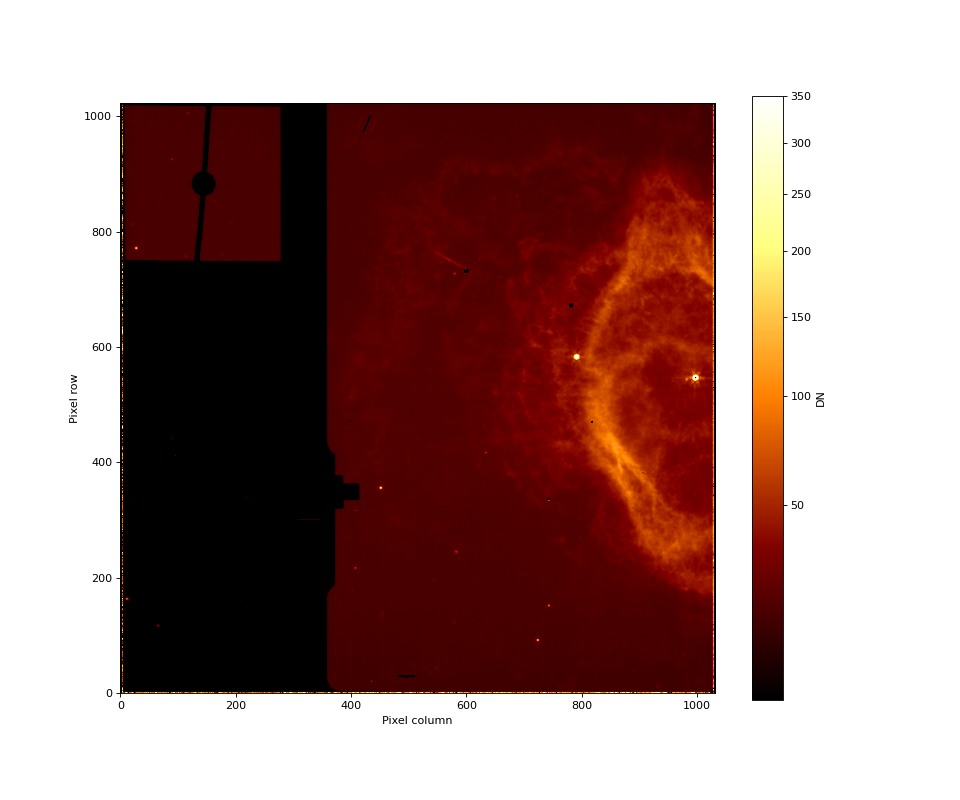

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

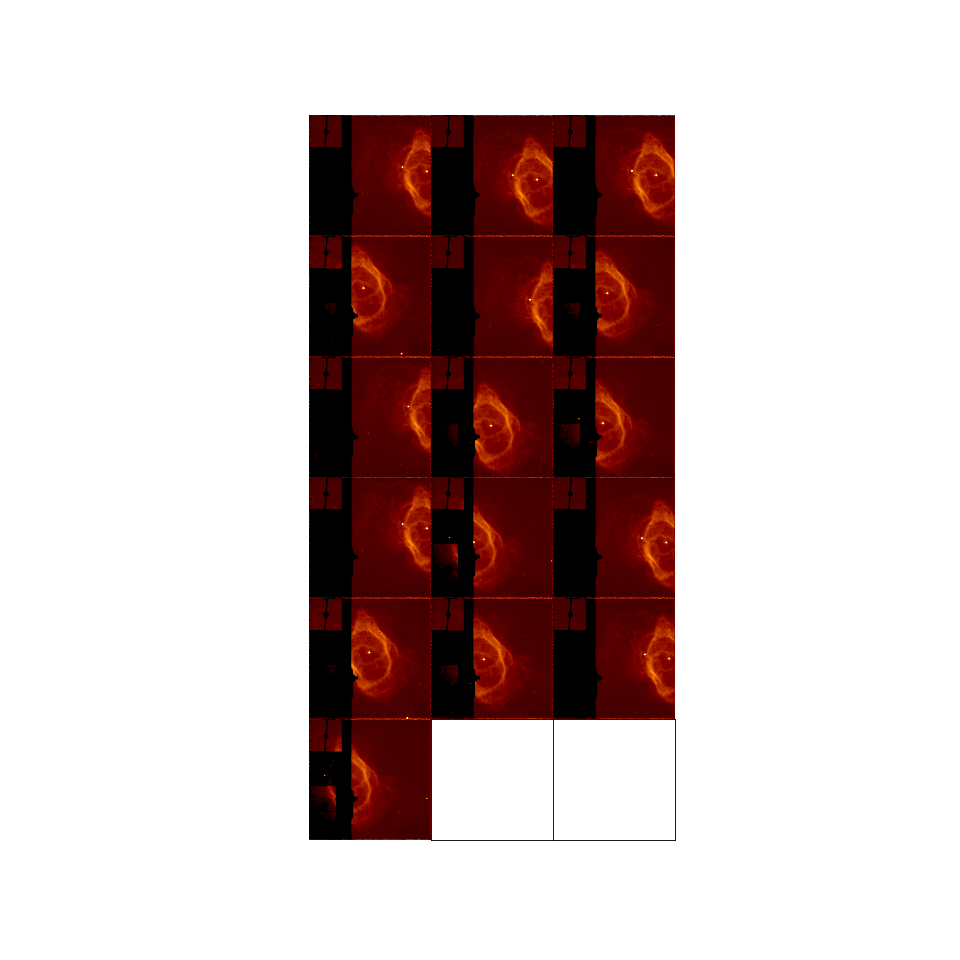

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F770W/stage1/jw02733002002_02101_00008_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00007_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00008_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002001_02101_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw02733002002_021

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-18 14:19:57,407 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-18 14:19:57,408 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-18 14:19:57,408 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-18 14:19:57,409 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-18 14:19:59,696 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-18 14:19:59,696 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-18 14:19:59,697 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-18 14:19:59,699 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-18 14:19:59,699 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-18 14:19:59,700 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-18 14:19:59,701 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file 

2022-07-18 14:19:59,729 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-18 14:19:59,729 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-18 14:19:59,729 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-18 14:19:59,730 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-18 14:19:59,730 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02733002001_02101_00003_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-18 14:19:59,733 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022

2022-07-18 14:19:59,763 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-18 14:19:59,764 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-18 14:19:59,764 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-18 14:19:59,765 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-18 14:19:59,765 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-18 14:19:59,765 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-18 14:19:59,765 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-18 14:19:59,765 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-18 14:19:59,766 - stpipe.Image2Pi

2022-07-18 14:19:59,796 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-18 14:19:59,797 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-18 14:19:59,797 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-18 14:19:59,797 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-18 14:19:59,798 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-18 14:19:59,798 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-18 14:19:59,799 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-18 14:19:59,799 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-18 14:19:59,825 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-18 14:19:59,825 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-18 14:19:59,826 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-18 14:19:59,826 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-18 14:19:59,826 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-18 14:19:59,827 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-18 14:19:59,827 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-18 14:19:59,827 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-18 14:19:59,828 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027330020

2022-07-18 14:19:59,858 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-18 14:19:59,858 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-18 14:19:59,859 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-18 14:19:59,860 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-18 14:19:59,860 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-18 14:19:59,861 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-18 14:19:59,861 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-18 14:19:59,889 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-18 14:19:59,889 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-18 14:19:59,889 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-18 14:19:59,890 - stpipe.Image2Pipeline - INFO - Starting calwebb_image2 ...
2022-07-18 14:19:59,932 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02733002002_02101_00008_mirimage_fixed
2022-07-18 14:19:59,932 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02733002002_02101_00008_mirimage_fixed_rate.fits ...
2022-07-18 14:20:00,185 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02733002002_02101_00008_mirimage_fixed_rate.fits>,).
2022-07-18 14:20:00,186 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [],

2022-07-18 14:20:06,740 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-18 14:20:06,949 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa'

2022-07-18 14:20:12,640 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  151.720313778 -40.449482838 151.754136260 -40.467261331 151.777636321 -40.441433770 151.743982686 -40.423394607
2022-07-18 14:20:12,640 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  151.720313778 -40.449482838 151.754136260 -40.467261331 151.777636321 -40.441433770 151.743982686 -40.423394607
2022-07-18 14:20:12,641 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-18 14:20:12,709 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-18 14:20:12,892 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02733002002_02101_00007_mirimage_fixed_rate.fits>,).
2022-07-18 14:20:12,893 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-18 14:20:18,600 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-18 14:20:18,695 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:20:18,696 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:20:18,696 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:20:18,702 - stpipe.Image2Pipeline.flat_field - WARNING - K

2022-07-18 14:20:24,353 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:20:24,359 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:20:24,484 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-18 14:20:24,673 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02733002002_02101_00005_mirimage_fixed_rate.fits>,).
2022-07-18 14:20:24,675 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-18 14:20:24

2022-07-18 14:20:30,426 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-18 14:20:30,426 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-18 14:20:30,511 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-18 14:20:30,512 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-18 14:20:30,512 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-18 14:20:30,512 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-18 14:20:30,554 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-18 14:20:30,556 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-18 14:20:30,557 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-18 14:20:30,557 - stpipe.Image2P

2022-07-18 14:20:36,234 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-18 14:20:36,234 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-18 14:20:36,235 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-18 14:20:36,251 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-18 14:20:36,446 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02733002002_02101_00004_mirimage_fixed_rate.fits>,).
2022-07-18 14:20:36,448 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None,

2022-07-18 14:20:42,196 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-18 14:20:42,348 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-18 14:20:42,824 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-18 14:20:43,158 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-18 14:20:43,635 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-18 14:20:43,972 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-18 14:20:44,447 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-18 14:20:44,786 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-18 14:20:45,259 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-18 14:20:45,614 - stpipe.Image2Pipeline.resample 

2022-07-18 14:20:50,506 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-18 14:20:50,976 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-18 14:20:51,328 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  151.732177165 -40.438922965 151.766037667 -40.456855292 151.789820602 -40.430828795 151.755966861 -40.412903406
2022-07-18 14:20:51,912 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02733002001_02101_00001_mirimage_fixed_i2d.fits
2022-07-18 14:20:51,912 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-18 14:20:51,912 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02733002001_02101_00001_mirimage_fixed
2022-07-18 14:20:51,914 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02733002002_02101_00003_mirimage_fixed
2022-07-18 14:20:51,914 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02

2022-07-18 14:20:57,743 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02733002001_02101_00006_mirimage_fixed
2022-07-18 14:20:57,744 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02733002001_02101_00006_mirimage_fixed_rate.fits ...
2022-07-18 14:20:57,999 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02733002001_02101_00006_mirimage_fixed_rate.fits>,).
2022-07-18 14:20:58,001 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-18 14:21:04,033 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-18 14:21:04,117 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  151.719881691 -40.452434255 151.753705543 -40.470212876 151.777206804 -40.444385403 151.743551808 -40.426346114
2022-07-18 14:21:04,118 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  151.719881691 -40.452434255 151.753705543 -40.470212876 151.777206804 -40.444385403 151.743551808 -40.426346114
2022-07-18 14:21:04,118 - stpip

2022-07-18 14:21:10,098 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  151.727029755 -40.439434291 151.760848815 -40.457210981 151.784342988 -40.431382170 151.750692726 -40.413344798
2022-07-18 14:21:10,098 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-18 14:21:10,168 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-18 14:21:10,382 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02733002001_02101_00004_mirimage_fixed_rate.fits>,).
2022-07-18 14:21:10,383 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-18 14:21:16,438 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:21:16,439 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:21:16,439 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:21:16,445 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-18 14:21:16,572 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-18 14:21:16,783 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02733002001_02101_00002_mirimage_fixed_rate.fits>,).
2022-07-18 14:21:16,784 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-18 14:21:22,658 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02733002002_02101_00002_mirimage_fixed_rate.fits>,).
2022-07-18 14:21:22,659 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-18 14:21:22,684 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-18 14:21:22,684 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-18 14:21:22,766 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-18 14:21:22

2022-07-18 14:21:28,536 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-18 14:21:28,618 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-18 14:21:28,618 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-18 14:21:28,619 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-18 14:21:28,619 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-18 14:21:28,663 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-18 14:21:28,665 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-18 14:21:28,666 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-18 14:21:28,666 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-18 14:21:28,683 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-18 14:21:28,901 - stpipe.Ima

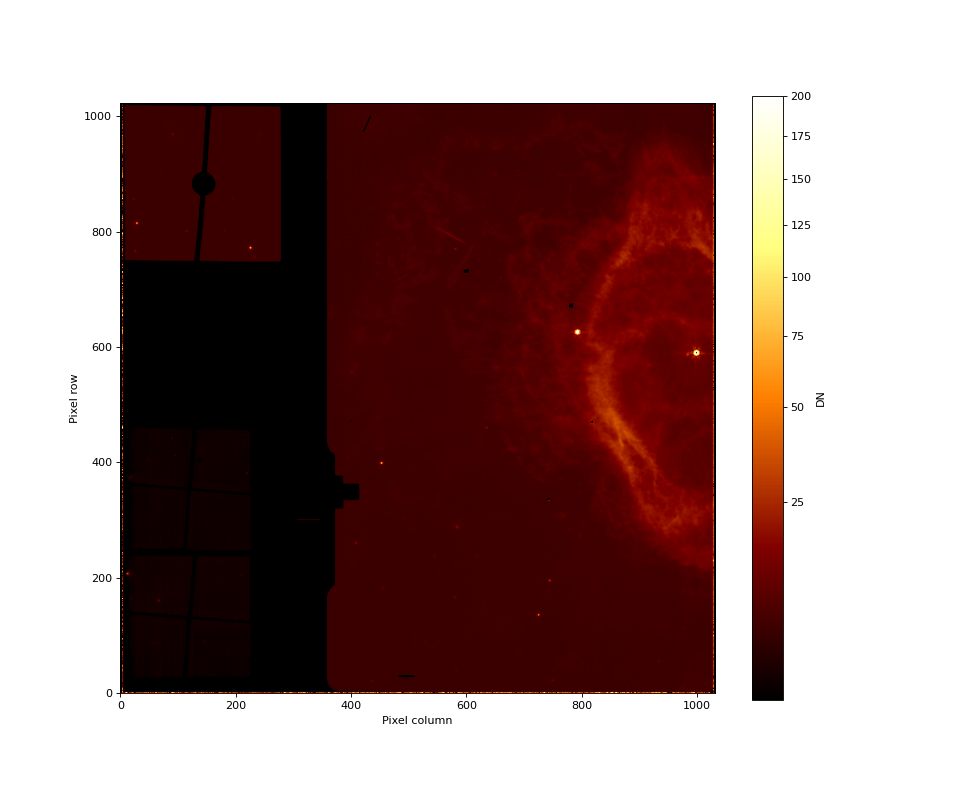

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

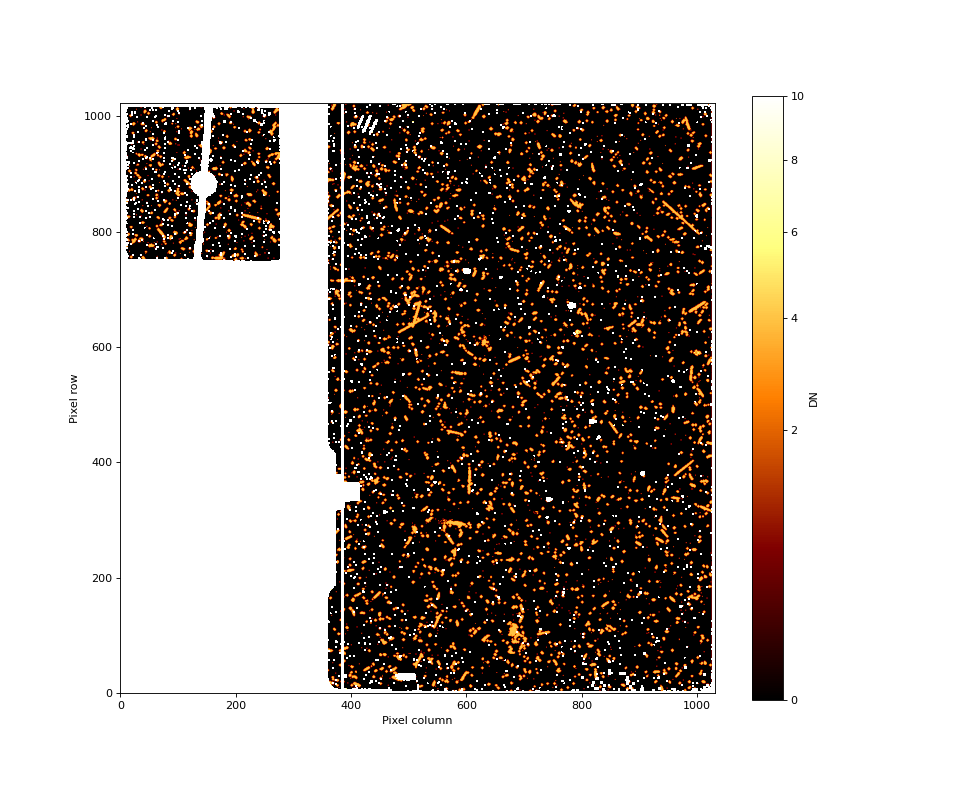

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

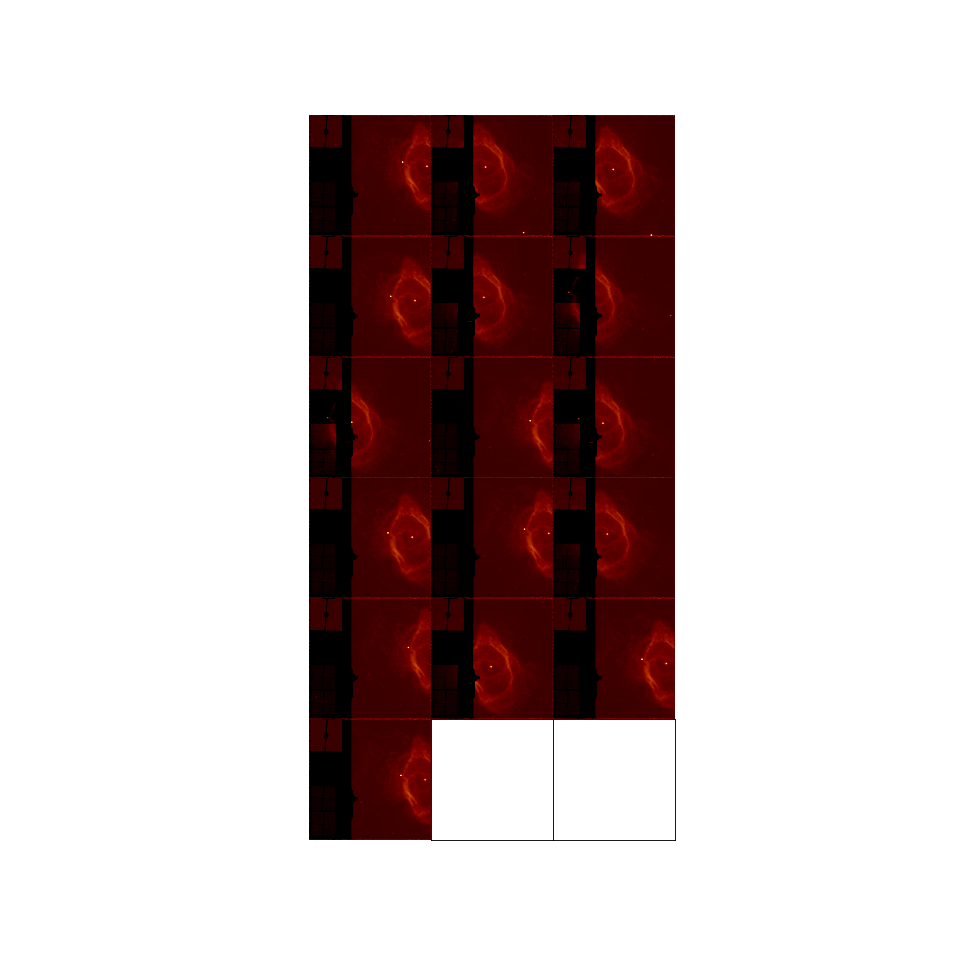

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F770W/stage2/jw02733002001_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00006_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00008_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00005_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00006_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002001_02101_00008_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02733002002_02101_00001_mirimage_fixed_wcs_ca

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-18 14:22:09,575 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-18 14:22:09,576 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-18 14:22:09,577 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-18 14:22:09,579 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-18 14:22:10,216 - stpipe.Image3Pipeline - INFO - Prefetch for APCORR reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits'.
2022-07-18 14:22:10,217 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-18 14:22:10,218 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-18 14:22:13,756 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-18 14:22:13,758 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.2, 'snr_threshold': 5, 'brightest': 20

2022-07-18 14:22:49,707 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 5635 (0.53%)
2022-07-18 14:22:49,783 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 4790 (0.45%)
2022-07-18 14:22:49,859 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 5907 (0.56%)
2022-07-18 14:22:49,936 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2293 (0.22%)
2022-07-18 14:22:50,011 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2121 (0.20%)
2022-07-18 14:22:50,087 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1617 (0.15%)
2022-07-18 14:22:50,163 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1132 (0.11%)
2022-07-18 14:22:50,238 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2799 (0.26%)
2022-07-18 14:22:51,367 - stpipe.Image3P

2022-07-18 14:23:39,487 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:39,830 - stpipe.Image3Pipeline.resample - INFO - Resampling var_poisson
2022-07-18 14:23:40,461 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:41,430 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:42,405 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:43,374 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:44,353 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:45,328 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:46,291 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1749)
2022-07-18 14:23:47,256 - stpipe.Image3Pipeline.resample - INFO

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

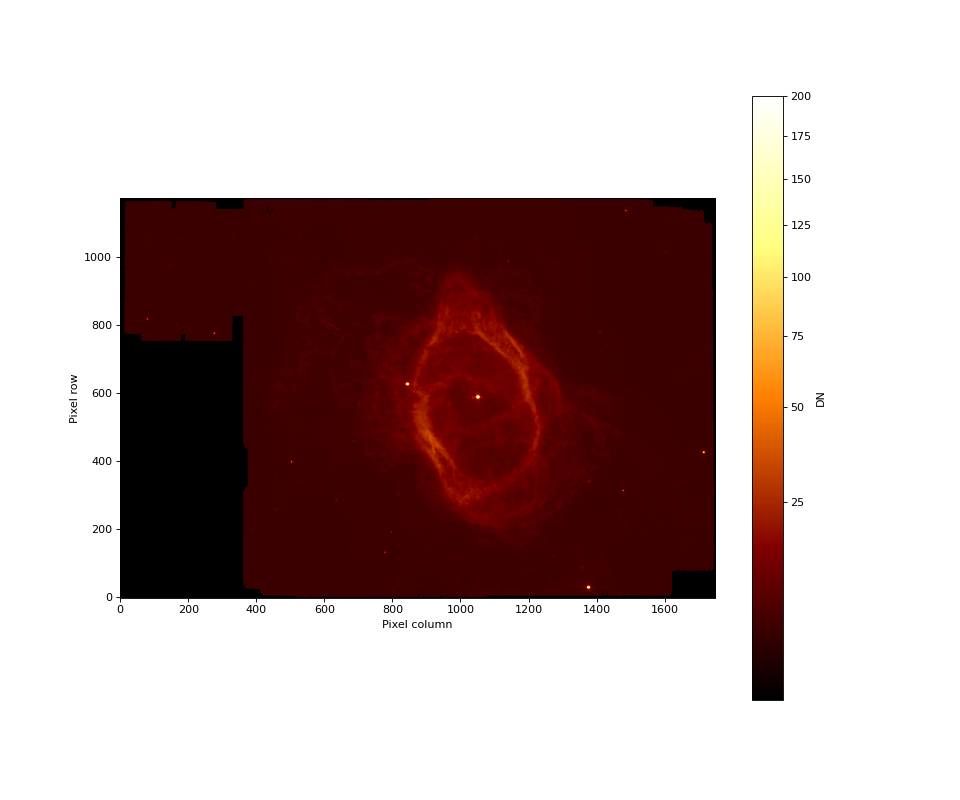

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

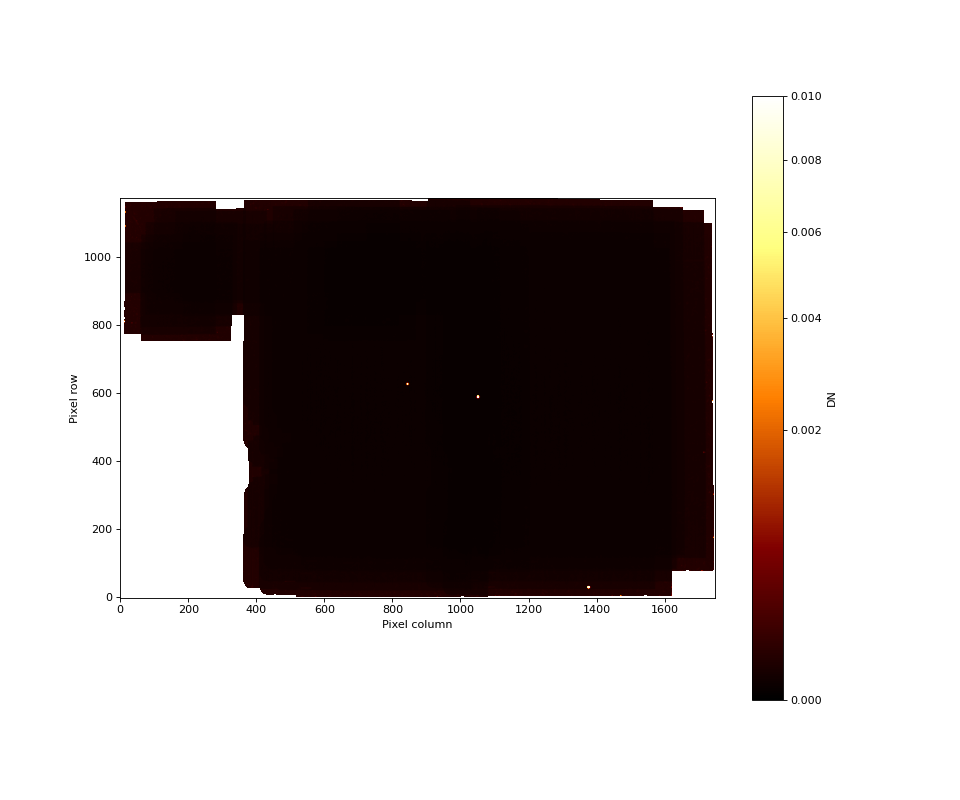

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

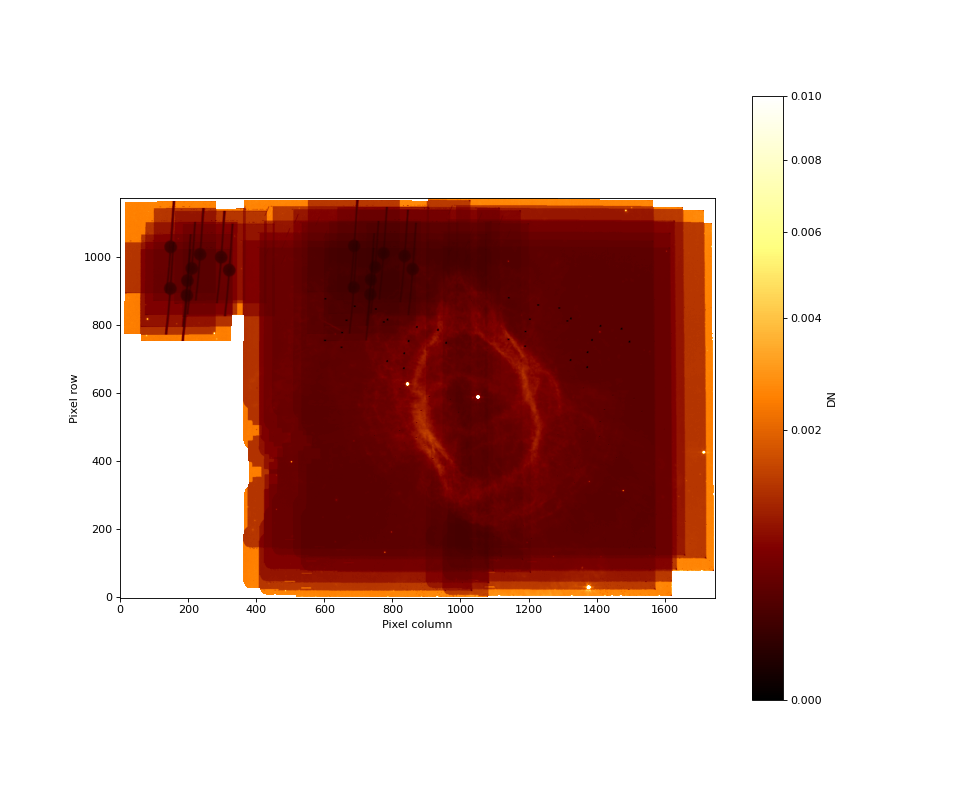

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

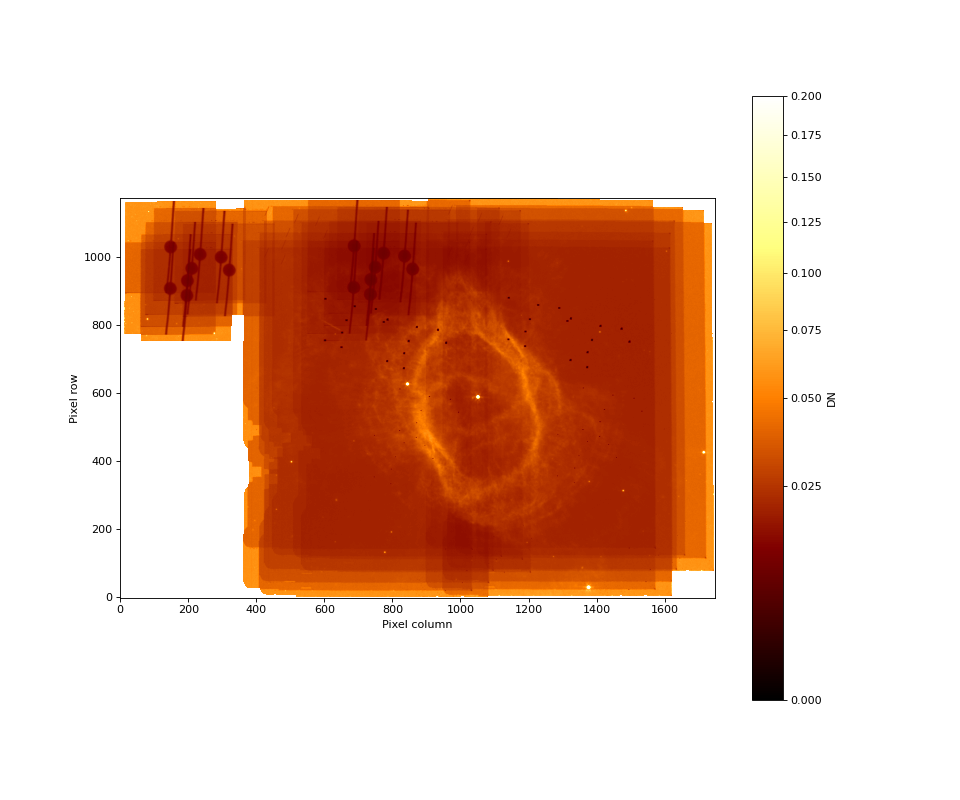

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

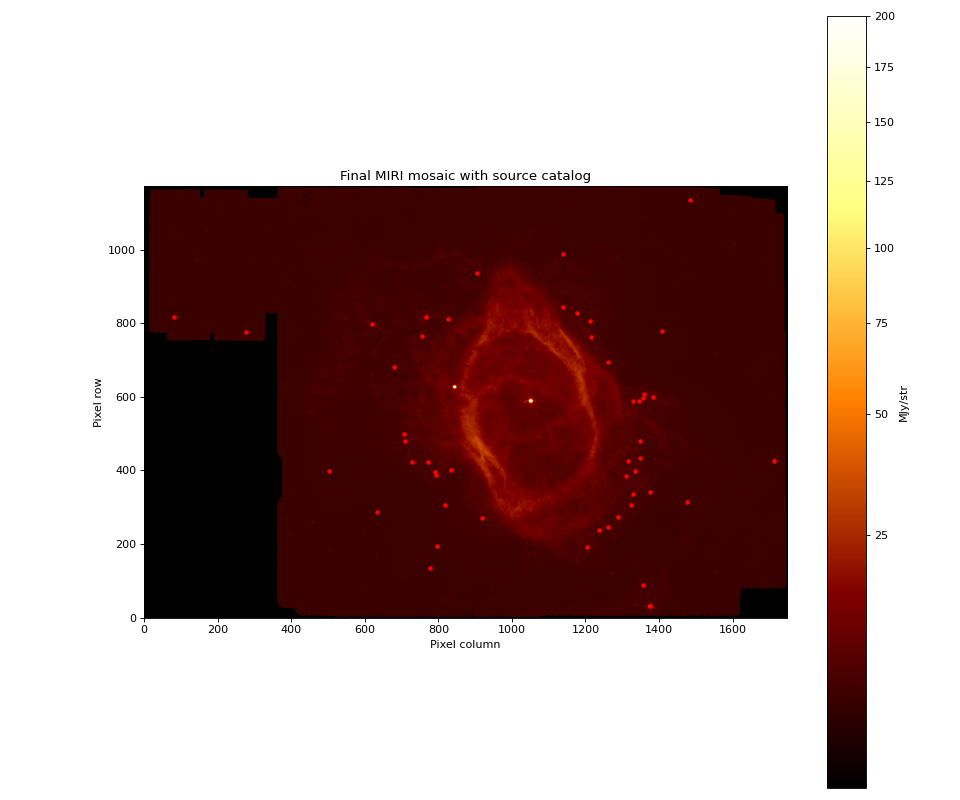

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)